In [1]:
from mplsoccer.pitch import Pitch
import numpy as np
import pandas as pd
import matplotlib.patheffects as path_effects

# Some data from Fbref / StatsBomb

In [2]:
fb_data = {'Team': ['Arsenal', 'Aston Villa', 'Bournemouth', 'Brighton', 'Burnley', 'Chelsea',
                    'Crystal Palace', 'Everton', 'Leicester City', 'Liverpool', 'Manchester City',
                    'Manchester Utd', 'Newcastle Utd', 'Norwich City', 'Sheffield Utd', 'Southampton',
                    'Tottenham', 'Watford', 'West Ham', 'Wolves'],
           #'tackle_def_3rd': [271, 287, 241, 279, 210, 294, 334, 310, 315, 192, 187, 243, 326, 349,
           #                   293, 326, 288, 290, 337, 346],
           #'tackle_mid_3rd': [168, 161, 178, 203, 203, 246, 206, 234, 241, 222, 192, 200, 163, 186,
           #                   184, 256, 242, 219, 213, 219],
           #'tackle_att_3rd': [60, 60, 47, 77, 66, 75, 56, 95, 82, 104, 85, 72, 51, 69, 71, 84, 51,
           #                   70, 52, 58],
           'Def 3rd': [1909, 1858, 1882, 1653, 1463, 1509, 2113, 1655, 1793, 1295, 995, 1611,
                       2233, 2249, 1795, 1900, 1917, 1933, 2091, 2032],
           'Mid 3rd': [2227, 2100, 2431, 2033, 2193, 2416, 2153, 2257, 2420, 2029, 1853,
                       2303, 2061, 2302, 2256, 2508, 2350, 2509, 2465, 2445],
           'Att 3rd': [1018, 1048, 1272, 1155, 1264, 1307, 942, 1197, 1187, 1520, 1391, 1179,
                       861, 1034, 1291, 1472, 1026, 1239, 1064, 937]}

In [3]:
df = pd.DataFrame(fb_data)

Calculate league percentages

In [4]:
df_total = pd.DataFrame(df.sum(numeric_only=True))
df_total.columns = ['total']
df_total = df_total.T
df_total = df_total.divide(df_total.sum(axis=1), axis=0) * 100

In [5]:
df_total

,Def 3rd,Mid 3rd,Att 3rd
total,34.307511,43.317942,22.374547


Calculate team percentages

In [6]:
pressure_cols = ['Def 3rd', 'Mid 3rd', 'Att 3rd']
df[pressure_cols] = df[pressure_cols].divide(df[pressure_cols].sum(axis=1), axis=0) * 100
df.sort_values(['Att 3rd', 'Def 3rd'], ascending=[True, False], inplace=True)

In [7]:
df

,Team,Def 3rd,Mid 3rd,Att 3rd
12,Newcastle Utd,43.317168,39.980601,16.702231
19,Wolves,37.532324,45.160694,17.306982
6,Crystal Palace,40.572197,41.340246,18.087558
13,Norwich City,40.268577,41.217547,18.513876
18,West Ham,37.206406,43.861210,18.932384
16,Tottenham,36.217646,44.398262,19.384092
0,Arsenal,37.039193,43.209158,19.751649
1,Aston Villa,37.115461,41.949660,20.934878
17,Watford,34.025700,44.164760,21.809541
8,Leicester City,33.203704,44.814815,21.981481


# Calculate an empty bin statistic
I am lazy and as mplsoccer has a method for calculating bin statistics, I will use this and amend it each time with the statistic from the fbref dataframe.

In [8]:
pitch = Pitch(line_zorder=2, line_color='black', figsize=(16, 9), layout=(4, 5), tight_layout=False, constrained_layout=True)
bin_statistic = pitch.bin_statistic([0], [0], statistic='count', bins=(3,1))

# Draw the percentages

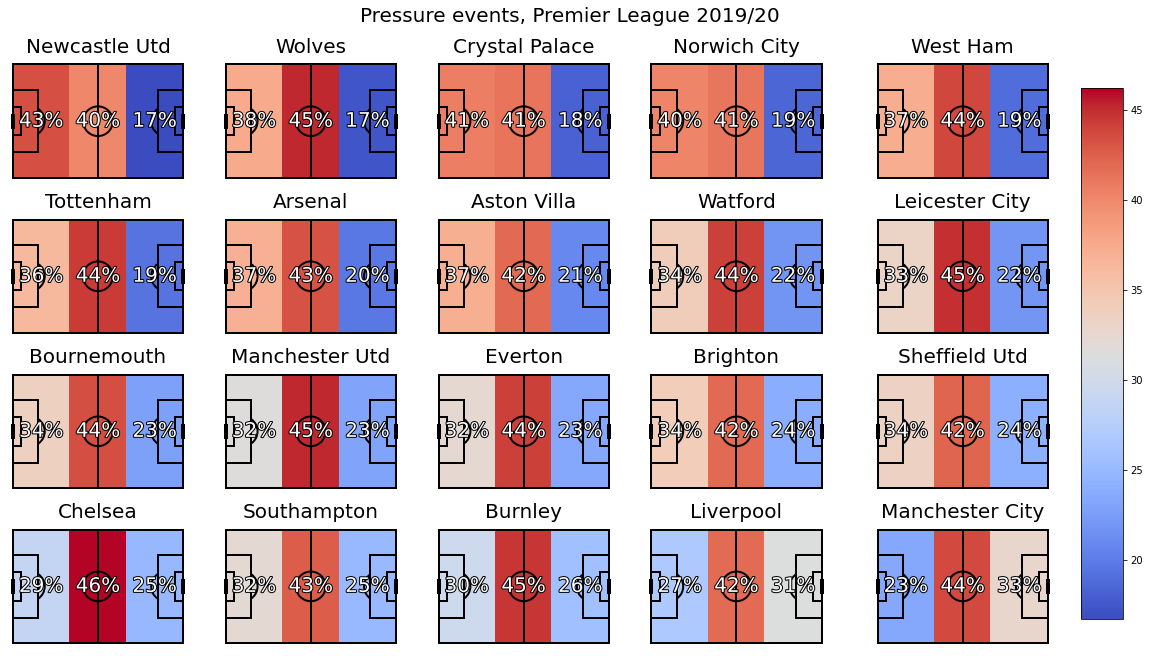

In [9]:
fig, axes = pitch.draw()
axes = axes.ravel()
teams = df['Team'].values
vmin = df[pressure_cols].min().min()
vmax = df[pressure_cols].max().max()
for i, ax in enumerate(axes):
    ax.set_title(teams[i], fontsize=20)
    bin_statistic['statistic'] = df.loc[df.Team == teams[i], pressure_cols].values
    heatmap = pitch.heatmap(bin_statistic, ax=ax, cmap='coolwarm', vmin=vmin, vmax=vmax)
    # plot labels
    bin_statistic['statistic'] = (pd.DataFrame(bin_statistic['statistic'])
                                  .round(0).astype(np.int32).applymap(lambda x: '{:d}%'.format(x)).values)
    annotate = pitch.label_heatmap(bin_statistic, color='white', fontsize=20, ax=ax, ha='center', va='center')
    for label in annotate:
        label.set_path_effects([path_effects.Stroke(linewidth=2, foreground='black'), path_effects.Normal()])
axes = axes.reshape(4, 5)
cbar = fig.colorbar(heatmap, ax=axes[:, 4], shrink=0.9)
title = fig.suptitle('Pressure events, Premier League 2019/20', fontsize=20)

# Draw League Average on a pitch

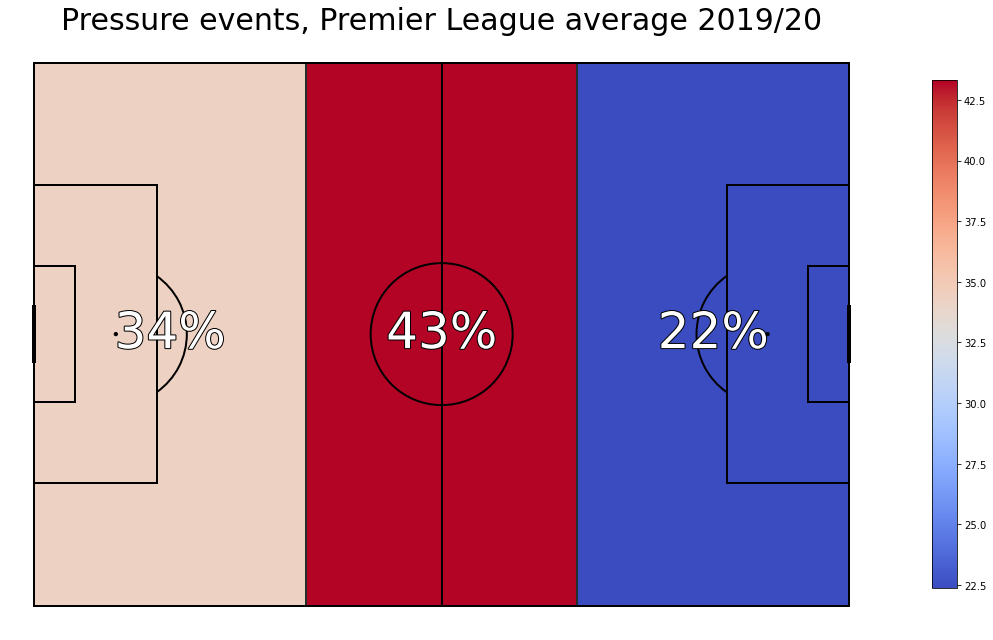

In [14]:
pitch = Pitch(line_zorder=2, line_color='black', figsize=(16, 9))
fig, ax = pitch.draw()
bin_statistic['statistic'] = df_total.values
heatmap = pitch.heatmap(bin_statistic, ax=ax, cmap='coolwarm', edgecolors='#22312b')
ax.set_title('Pressure events, Premier League average 2019/20', fontsize=30)
fig.colorbar(heatmap, shrink=0.85)
bin_statistic['statistic'] = (pd.DataFrame(bin_statistic['statistic'])
                              .round(0).astype(np.int32).applymap(lambda x: '{:d}%'.format(x)).values)
annotate = pitch.label_heatmap(bin_statistic, color='white', fontsize=50, ax=ax, ha='center', va='center')
for label in annotate:
    label.set_path_effects([path_effects.Stroke(linewidth=2, foreground='black'), path_effects.Normal()])

# Draw the percentage point difference from the league average

In [23]:
df[pressure_cols] = df[pressure_cols].values - df_total.values

In [24]:
df

,Team,Def 3rd,Mid 3rd,Att 3rd
12,Newcastle Utd,9.009656,-3.337340,-5.672316
19,Wolves,3.224812,1.842753,-5.067565
6,Crystal Palace,6.264685,-1.977696,-4.286989
13,Norwich City,5.961065,-2.100395,-3.860671
18,West Ham,2.898894,0.543268,-3.442163
16,Tottenham,1.910135,1.080320,-2.990455
0,Arsenal,2.731681,-0.108784,-2.622898
1,Aston Villa,2.807950,-1.368281,-1.439669
17,Watford,-0.281812,0.846818,-0.565007
8,Leicester City,-1.103808,1.496873,-0.393066


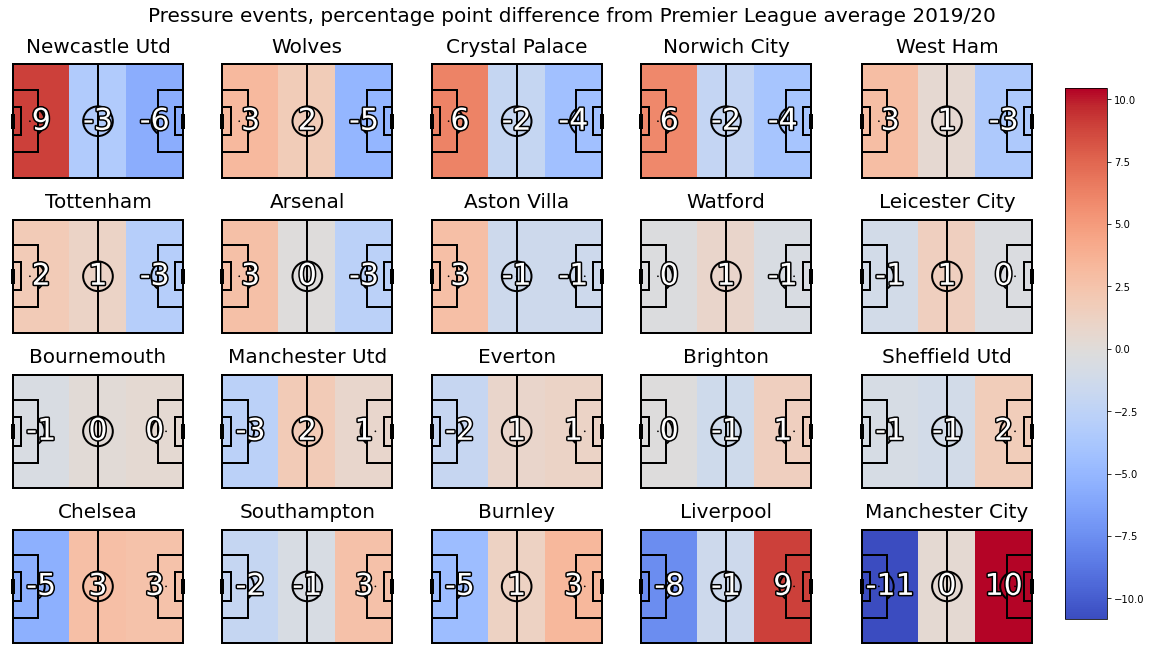

In [32]:
pitch = Pitch(line_zorder=2, line_color='black', figsize=(16, 9), layout=(4, 5), tight_layout=False, constrained_layout=True)
fig, axes = pitch.draw()
axes = axes.ravel()
teams = df['Team'].values
vmin = df[pressure_cols].min().min()
vmax = df[pressure_cols].max().max()
for i, ax in enumerate(axes):
    ax.set_title(teams[i], fontsize=20)
    bin_statistic['statistic'] = df.loc[df.Team == teams[i], pressure_cols].values
    heatmap = pitch.heatmap(bin_statistic, ax=ax, cmap='coolwarm', vmin=vmin, vmax=vmax)
    # plot labels
    bin_statistic['statistic'] = (pd.DataFrame(bin_statistic['statistic']).round(0).astype(np.int32))
    annotate = pitch.label_heatmap(bin_statistic, color='white', fontsize=30, ax=ax, ha='center', va='center')
    for label in annotate:
        label.set_path_effects([path_effects.Stroke(linewidth=3, foreground='black'), path_effects.Normal()])
axes = axes.reshape(4, 5)
cbar = fig.colorbar(heatmap, ax=axes[:, 4], shrink=0.9)
title = fig.suptitle('Pressure events, percentage point difference from Premier League average 2019/20', fontsize=20)